In [268]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ast
import dateutil
import numpy as np 
import json

In [269]:
with open('config.json') as f:
    config = json.load(f)

In [270]:
DIR_PATH = config['folder_path']
OUTPUT_NAME_FILE = [name for name in os.listdir(DIR_PATH) if name.endswith('.csv')][0]
OUTPUT_PATH_FILE = f'{DIR_PATH}/{OUTPUT_NAME_FILE}'
DF_HISTORY = pd.read_csv(OUTPUT_PATH_FILE, index_col=0).drop(columns=['time_between_listening_seconds'])

In [271]:
genra_list = set()
def add_to_set(genres):
    if type(genres) is str:
        for genre in ast.literal_eval(genres):
            genra_list.add(genre) 

DF_HISTORY['genres'].apply(lambda genre: add_to_set(genre))
genra_list = list(genra_list)

for genre in genra_list:
    attrs = {genre: [type(elem) is str and genre in elem for elem in DF_HISTORY['genres']]}
    DF_HISTORY = DF_HISTORY.assign(**attrs)

# Raw Value

In [272]:
DF_HISTORY.artist_name.value_counts()[0:20]

System of a Down                        676
Daron Malakian and Scars On Broadway    409
John Dolmayan                           375
Radiohead                               328
Joe Hisaishi                            321
VIZA                                    316
Dream Theater                           288
M83                                     212
Booba                                   200
Kaaris                                  140
Jesper Kyd                              138
Breaking Benjamin                       132
Gorillaz                                127
Avenged Sevenfold                       127
Damso                                   122
Starrysky                               116
Alice in Chains                         115
Kai Engel                               103
Harry Styles                             99
Phoenix                                  99
Name: artist_name, dtype: int64

In [112]:
DF_HISTORY.album_name.value_counts()[0:20]

These Grey Men                              372
Dictator                                    211
Hurry up, We're Dreaming                    204
Made In Chernobyl                           199
Scars on Broadway                           198
Toxicity                                    186
The Bends                                   183
Dream Songs: The Essential Joe Hisaishi     169
Hypnotize                                   151
Distance Over Time (Bonus track version)    137
Mezmerize                                   136
OK Computer                                 133
Steal This Album!                           132
Princess Mononoke Soundtrack                128
Nightmare                                   126
Phobia (Collector Edition)                  120
ULTRA                                       108
Octavarium                                  101
Fine Line                                    97
Random Access Memories                       95
Name: album_name, dtype: int64

In [273]:
DF_HISTORY.listening_time.describe()

count    7579.000000
mean      180.782821
std        98.305407
min         0.000000
25%       114.000000
50%       176.000000
75%       228.000000
max      1438.000000
Name: listening_time, dtype: float64

<AxesSubplot:ylabel='None'>

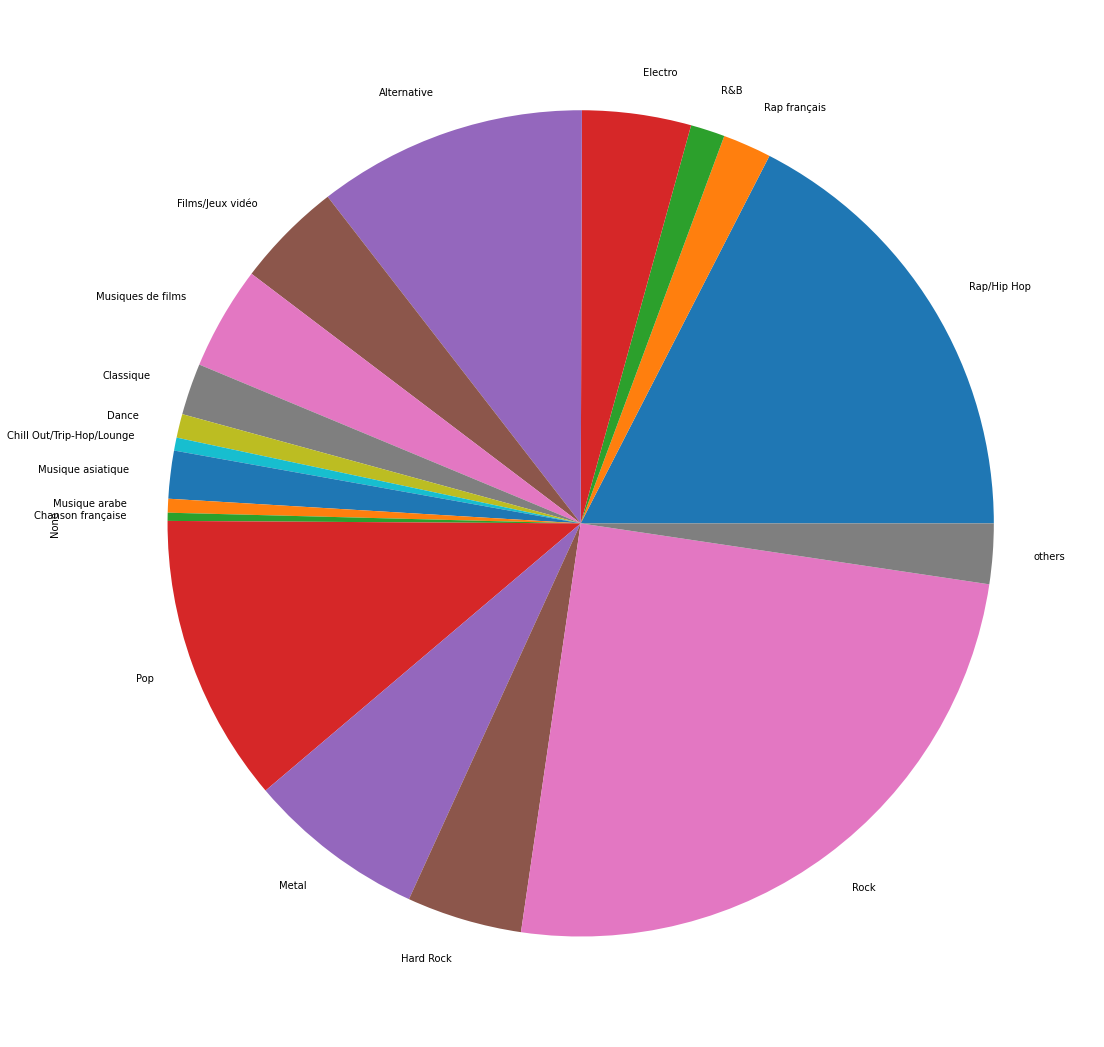

In [148]:
 genres_sr = DF_HISTORY[['Trance', 'Rap/Hip Hop','Rap français', 'R&B contemporain','R&B', 'BO TV', 'Electro', 'Jeunesse',
       'Latino', 'Soul contemporaine', 'Alternative',
       'Films/Jeux vidéo','Bandes originales', 'Jazz',
       'Comédies musicales', 'Moderne', 'Techno/House',
       'Musique africaine', 'Musiques de films',
       'Classique', 'Dance', 'Musiques de jeux vidéo',
       'Pop indé/Folk', 'Chill Out/Trip-Hop/Lounge', 
       'Reggae', 'Musique asiatique', 'Musique arabe', 'Soul & Funk', 'Soul',
       'Singer & Songwriter', 'Chanson française', 'Folk', 'Pop', 'Pop Indé', 'Pop internationale',
       'Metal', 'Hard Rock', 'Electro Pop/Electro Rock', 'Rock', 'Rock & Roll/Rockabilly', 'Rock indé', 'Rock Indé/Pop Rock',
       'Variété Internationale', ]].sum()

aller = pd.Series([genres_sr[genres_sr < 30].sum()], index=["others"]) 
genres_sr = genres_sr.append(aller)

genres_sr[genres_sr >= 30].plot.pie(figsize=(19, 19))

In [155]:
DF_HISTORY.explicit_lyrics.value_counts(), DF_HISTORY.explicit_content_cover.value_counts(), DF_HISTORY.explicit_content_lyrics.value_counts()

(False    6681
 True     2144
 Name: explicit_lyrics, dtype: int64,
 2    4730
 0    3340
 1     744
 3       6
 6       5
 Name: explicit_content_cover, dtype: int64,
 0    5873
 1    2139
 6     629
 2     153
 3      31
 Name: explicit_content_lyrics, dtype: int64)

<AxesSubplot:xlabel='datetime'>

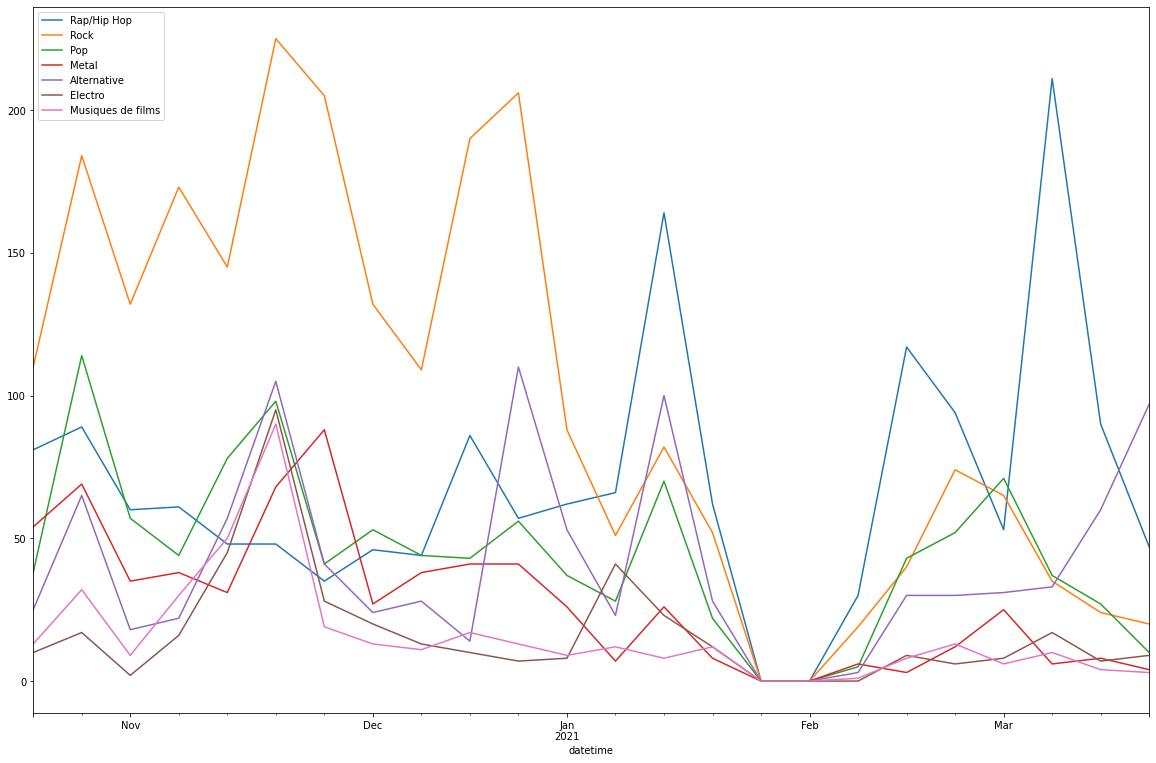

In [260]:
ts = DF_HISTORY[['datetime', 'Rap/Hip Hop', 'Rock', 'Pop', 'Metal', 'Alternative', 'Electro', 'Musiques de films']].sort_values('datetime')
ts['datetime'] = ts['datetime'].apply(dateutil.parser.parse)
ts  = ts.set_index('datetime')
data_resample = ts.resample('1W').sum()
data_resample.plot(figsize=(20,13))